In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [58]:
df=pd.read_csv('/content/Iris.csv')

In [59]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [61]:
df.shape

(150, 6)

In [62]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [63]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [64]:
X=df.drop('Species',axis=1)
Y=df['Species']

In [65]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

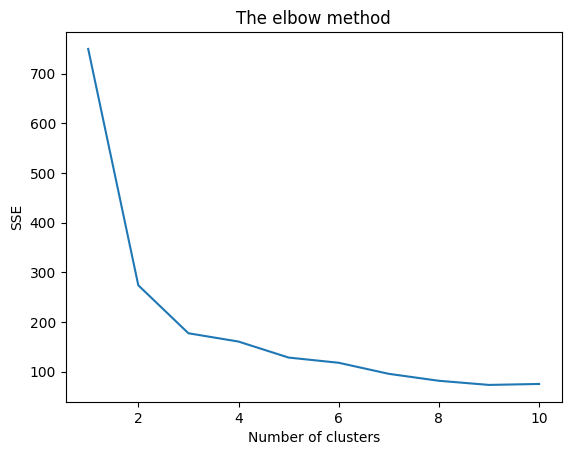

In [66]:
sse = [] #sum of squared errors represents distance between centrids & data points
for i in range (1,11):
  model= KMeans(n_clusters = i)
  model.fit(X_scaled)
  sse.append(model.inertia_) #inertia or within-cluster sum-of-squares

# Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 11), sse)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE') # Within cluster sum of squares
plt.show()


In [68]:
model = KMeans(n_clusters = 3)
y_predict = model.fit_predict(X_scaled)
y_predict
df['cluster'] = y_predict
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


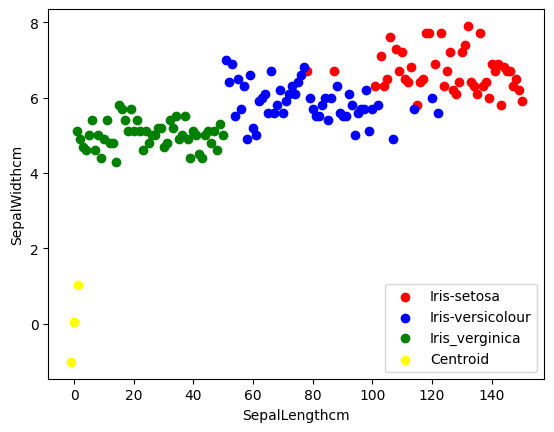

In [56]:
df1 = df[df['cluster']==0] #dividing the dataframe based on distinct clusters
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]

plt.scatter(df1.iloc[:,0], df1.iloc[:,1],c='red',label = 'Iris-setosa')
plt.scatter(df2.iloc[:,0], df2.iloc[:,1],c='blue',label = 'Iris-versicolour')
plt.scatter(df3.iloc[:,0], df3.iloc[:,1],c='green',label = 'Iris_verginica')
plt.xlabel("SepalLengthcm")
plt.ylabel("SepalWidthcm")

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1] , c = 'yellow', label = 'Centroid')

plt.legend(loc='lower right')

In [48]:
Z = linkage(X_scaled, method='ward')

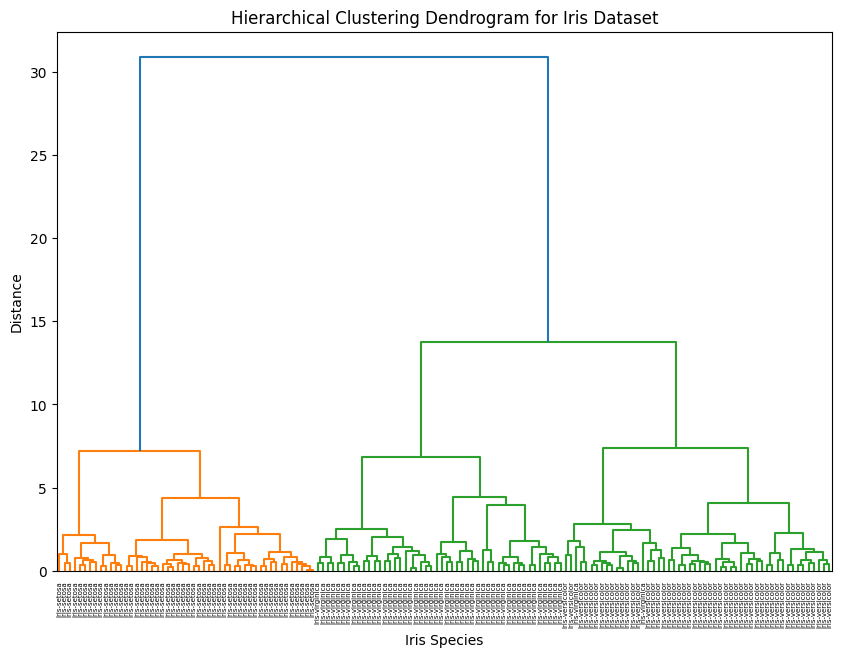

In [49]:
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=Y.values)
plt.title('Hierarchical Clustering Dendrogram for Iris Dataset')
plt.xlabel('Iris Species')
plt.ylabel('Distance')
plt.show()

In [50]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [51]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)


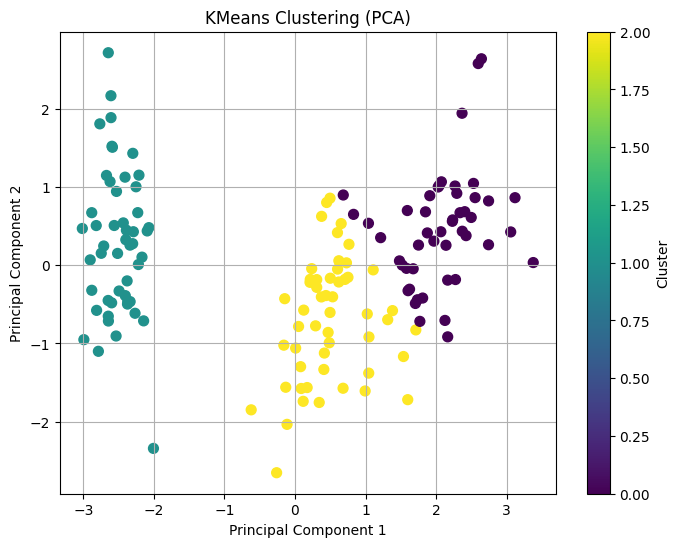

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("KMeans Clustering (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()